In [1]:
# %load basic.py
from IPython.display import set_matplotlib_formats, display
import numpy as np
import pandas as pd
import graphviz
import os
import mglearn
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc, font_manager
from cycler import cycler

font_name = font_manager.FontProperties(fname = "C:/Windows/Fonts/H2GTRM.TTF").get_name()
rc('font', family = font_name)
matplotlib.rcParams['axes.unicode_minus'] = False

set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300
plt.rcParams['image.cmap'] = "viridis"
plt.rcParams['image.interpolation'] = "none"
plt.rcParams['savefig.bbox'] = "tight"
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['legend.numpoints'] = 1
plt.rc('axes', prop_cycle=(
    cycler('color', mglearn.plot_helpers.cm_cycle.colors) +
    cycler('linestyle', ['-', '-', "--", (0, (3, 3)), (0, (1.5, 1.5))])))

np.set_printoptions(precision=3, suppress=True)

pd.set_option("display.max_columns", 8)
pd.set_option('precision', 2)

__all__ = ['np', 'mglearn', 'display', 'plt', 'pd']

C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
# %load import_set2.py
# sklearn dataset
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_boston
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles
from sklearn.datasets import load_iris

from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D, axes3d

# sklearn 모델
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

## 2.3.5 결정 트리

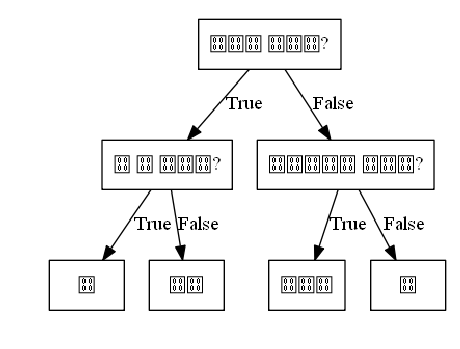

In [3]:
# module 'graphviz' has no attribute 'Digraph' 에러 해결 후 다시 실행
# Image data of dtype object cannot be converted to float 라는 새로운 에러 발생
# 박스 안 글씨가 주사위 숫자 4가 보이는 네모들로 이상하게 출력됨
mglearn.plots.plot_animal_tree()

### 결정 트리의 복잡도 제어하기

과대 적합을 막는 전략은 크게 두 가지입니다.  
- 트리 생성을 일찍 중단하는 전략 (사전 가지치기 pre-pruning)  
    (트리의 최대 깊이나 리프의 최대 갯수를 제한하거나 노드가 분할하기 위한 포인트의 최소 갯수를 지정)
- 트리를 만든 후 데이터 포인트가 적은 노드를 삭제하거나 병합하는 전략 (사후 가지치기 post-pruning, 가지치기 pruning)

scikit-learn에서의 결정 트리 : DecisionTreeRegressor, DecisionTreeClassifier  
-> 사전 가지치기만 지원합니다.

In [4]:
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 42)
tree = DecisionTreeClassifier(random_state = 0)
tree.fit(X_train, y_train)

print("훈련 세트 점수 : {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 점수 : {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 점수 : 1.000
테스트 세트 점수 : 0.937


결정 트리의 깊이를 제한하지 않으면 트리는 무한정 깊어지고 복잡해질 수 있습니다.  
-> 가지치기를 하지 않은 트리는 과대적합되기 쉽고 새로운 데이터에 잘 일반화되지 않습니다.  

In [5]:
tree = DecisionTreeClassifier(max_depth = 4, random_state = 0)
tree.fit(X_train, y_train)

print("훈련 세트 점수 : {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 점수 : {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 점수 : 0.988
테스트 세트 점수 : 0.951


훈련 세트의 정확도는 떨어졌지만 테스트 세트의 성능은 개선되었습니다.

### 결정 트리 분석

In [6]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file = 'tree.dot', class_names = ["악성", "양성"],
               feature_names = cancer.feature_names, impurity = False, filled = True)

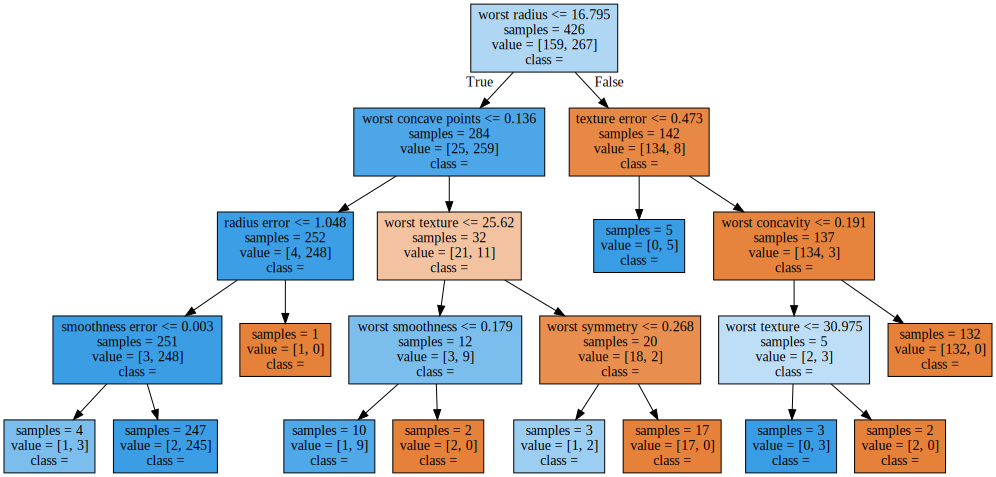

In [7]:
import graphviz

with open('tree.dot', encoding = 'utf-8') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

### 트리의 특성 중요도

In [8]:
print("특성 중요도 : \n", tree.feature_importances_)

특성 중요도 : 
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.01  0.048
 0.    0.    0.002 0.    0.    0.    0.    0.    0.727 0.046 0.    0.
 0.014 0.    0.018 0.122 0.012 0.   ]


트리를 만드는 결정에 각 특성이 얼마나 중요한지를 평가하는 **특성 중요도**입니다.  
0과 1 사이의 숫자로, 각 특성에 대해 0은 전혀 사용되지 않았다는 뜻이고 1은 완벽하게 타깃 클래스를 예측했다는 뜻입니다.  
**특성 중요도의 전체 합은 1입니다.**

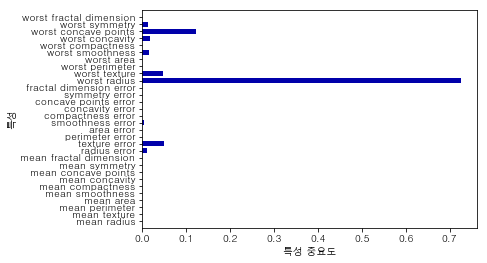

In [9]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align = 'center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)
    
plot_feature_importances_cancer(tree);

feature_importances_값이 낮다고 해서 유용하지 않은 특성이라는 뜻은 아닙니다.  
단지, 트리가 그 특성을 선택하지 않았을 뿐이며 다른 특성이 동일한 정보를 지니고 있어서일 수 있습니다.

#### y축의 특성이 클래스 레이블과 복합적인 관계를 가지고 있는 2차원 dataset과 결정 트리가 만든 결정 경계와 트리

Feature importances: [0. 1.]


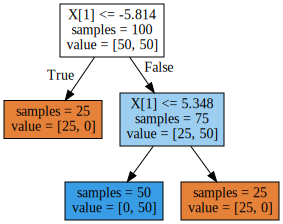

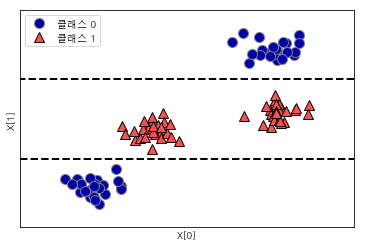

In [10]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

DecisionTreeRegressor(그리고 모든 다른 트리 기반 회귀 모델)는 외삽extrapolation,  
즉 **훈련 데이터의 범위 밖의 포인트에 대해 예측을 할 수 없습니다.**

C:\Users\hyooo\Anaconda3\lib\site-packages\matplotlib\mathtext.py:843: MathTextWarning: Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
  MathTextWarning)


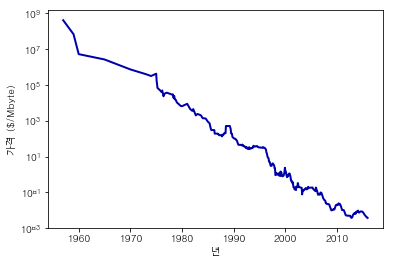

In [11]:
import os
# ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, 'ram_price.csv'))
# FileNotFoundError
ram_prices = pd.read_csv('../data/ram_price.csv')
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("년")
plt.ylabel("가격 ($/Mbyte)");

In [12]:
from sklearn.tree import DecisionTreeRegressor
# 2000년 이전을 훈련 데이터로, 2000년 이후를 테스트 데이터로 만듭니다.
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# 가격 예측을 위해 날짜 특성만을 이용합니다.
X_train = data_train.date[:, np.newaxis]

# 데이터와 타깃 사이의 관계를 간단하게 만들기 위해 로그 스케일로 바꿉니다.
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# 예측은 전체 기간에 대해서 수행합니다.
X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# 예측한 값의 로그 스케일을 되돌립니다.
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

C:\Users\hyooo\Anaconda3\lib\site-packages\matplotlib\mathtext.py:843: MathTextWarning: Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
  MathTextWarning)


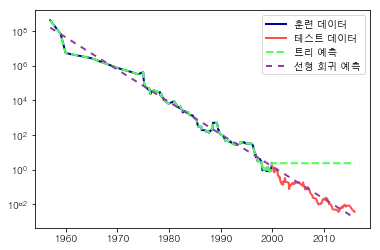

In [13]:
plt.semilogy(data_train.date, data_train.price, label = "훈련 데이터")
plt.semilogy(data_test.date, data_test.price, label = "테스트 데이터")
plt.semilogy(ram_prices.date, price_tree, label = "트리 예측")
plt.semilogy(ram_prices.date, price_lr, label = "선형 회귀 예측")
plt.legend();

### 장단점과 매개변수

결정 트리에서 모델 복잡도를 조절하는 매개변수는 사전 가지치기 매개변수입니다.  
max_depth, max_leaf_nodes, min_samples_leaf 중 하나만 지정해도 과대적합을 막는 데 충분합니다.

결정 트리가 앞의 다른 알고리즘보다 나은 점  
1. 만들어진 모델을 쉽게 시각화할 수 있어서 비전문가도 이해하기 쉽습니다.(비교적 작은 트리일 때)
2. 데이터의 스케일에 구애받지 않습니다.
3. 특성의 정규화나 표준화 같은 전처리 과정이 필요 없습니다.  
    (**why?** 각 특성이 개별적으로 처리되어 있어 데이터를 분할하는 데 데이터 스케일의 영향을 받지 않으므로)  
    -> 특히 특성의 스케일이 서로 다르거나 이진 특성과 연속적인 특성이 혼합되어 있을 때도 잘 작동!!

결정 트리의 주요 단점  
사전 가지치기를 사용함에도 불구하고 과대적합되는 경향이 있어 일반화 성능이 좋지 않습니다.  
-> 앙상블 방법을 단일 결정 트리의 대안으로 흔히 사용합니다.